<a href="https://colab.research.google.com/github/Himanshu5iiser/miscellaneous/blob/main/dynamic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segmented** **least** **squares**

Linear regression is not designed to cover situations where points look to lie on a sequence of lines.

Either number of lines can be hardcoded which is intuitive after looking at the scatter of points or this can be formalized by using segmented least squares.

But in this approach solution with least bias is the one in which n-1 line segments are assumed but gives high variance.  So, we want the number of line segments to be somewhere between 1 and n-1, where n is the size of data.

**Synthetic data for implementation**

In [ ]:
import numpy as np

In [ ]:
x1=np.random.uniform(0,1,20)
x2=np.random.uniform(1,2,20)
x3=np.random.uniform(2,3,20)
x1.sort()
x2.sort()
x3.sort()
y1=x1+np.random.normal(0,0.05,20)
y2=1+np.random.normal(0,0.05,20)
y3=-0.5*x3+2+np.random.normal(0,0.05,20)
print(x1,y1,x2,y2)

[0.05612686 0.09302621 0.11030104 0.15549881 0.18774018 0.28185076
 0.35378065 0.35471089 0.39937754 0.42374454 0.47302728 0.56772423
 0.58488509 0.68131893 0.91751805 0.94822867 0.95330234 0.97013574
 0.97588193 0.99165762] [0.10529105 0.08711094 0.09244028 0.11905672 0.20289083 0.25732619
 0.32315237 0.37413363 0.38586658 0.42007587 0.59478887 0.54897076
 0.56175512 0.64069145 0.88348419 0.98500179 0.93362431 0.97491893
 0.95022684 0.96397529] [1.05689578 1.05765272 1.08271319 1.16930216 1.20380117 1.25259598
 1.2760475  1.35802174 1.37514929 1.4065949  1.41065044 1.4403513
 1.48672653 1.60014137 1.68215115 1.78334191 1.84486637 1.85960509
 1.9696238  1.99117513] [0.97873104 1.00995096 1.06286498 1.0240578  0.97447234 1.01892115
 0.97901627 0.98248345 0.99575203 0.91557752 0.9861946  1.0504667
 0.93027119 1.03900293 1.01447249 0.98422714 0.97005221 0.94886547
 1.01194334 0.99863792]


In [ ]:
x=np.hstack((x1,x2))
x=np.hstack((x,x3))
y=np.hstack((y1,y2))
y=np.hstack((y,y3))
print(x,y)

[0.05612686 0.09302621 0.11030104 0.15549881 0.18774018 0.28185076
 0.35378065 0.35471089 0.39937754 0.42374454 0.47302728 0.56772423
 0.58488509 0.68131893 0.91751805 0.94822867 0.95330234 0.97013574
 0.97588193 0.99165762 1.05689578 1.05765272 1.08271319 1.16930216
 1.20380117 1.25259598 1.2760475  1.35802174 1.37514929 1.4065949
 1.41065044 1.4403513  1.48672653 1.60014137 1.68215115 1.78334191
 1.84486637 1.85960509 1.9696238  1.99117513 2.03976011 2.14988556
 2.18074791 2.2682664  2.30441502 2.33044465 2.35383268 2.36990052
 2.37073107 2.47486771 2.51525057 2.52152624 2.54188812 2.68361722
 2.7425402  2.88552147 2.91651646 2.92100178 2.9579585  2.97174524] [0.10529105 0.08711094 0.09244028 0.11905672 0.20289083 0.25732619
 0.32315237 0.37413363 0.38586658 0.42007587 0.59478887 0.54897076
 0.56175512 0.64069145 0.88348419 0.98500179 0.93362431 0.97491893
 0.95022684 0.96397529 0.97873104 1.00995096 1.06286498 1.0240578
 0.97447234 1.01892115 0.97901627 0.98248345 0.99575203 0.91557

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
xact=np.arange(0,3.1,0.1)
yact=xact[:10]
yact=np.hstack((yact,[1]*10))
yact=np.hstack((yact,-0.5*xact[20:]+2))

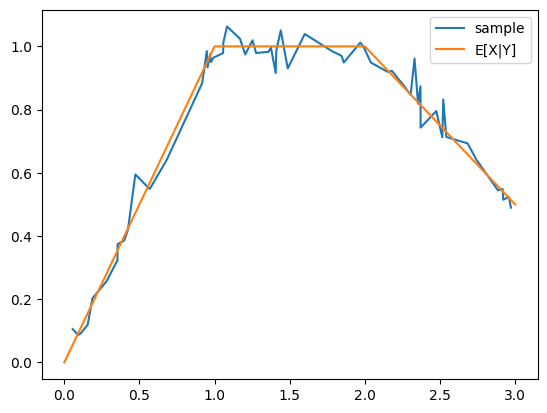

In [ ]:
plt.plot(x,y,label="sample")
plt.plot(xact,yact,label="E[X|Y]")
plt.legend()
plt.show()

**Prefix sums**

In [ ]:
xy_sum=np.cumsum(x*y)
x2_sum=np.cumsum(x*x)
x_sum=np.cumsum(x)
y_sum=np.cumsum(y)
y2_sum=np.cumsum(y*y)

In [ ]:
x2_sum=np.concatenate((np.array([0.]),x2_sum))
xy_sum=np.concatenate((np.array([0.]),xy_sum))
x_sum=np.concatenate((np.array([0.]),x_sum))
y_sum=np.concatenate((np.array([0.]),y_sum))
y2_sum=np.concatenate((np.array([0.]),y2_sum))

**Helper Functions**

1.Coefficients of linear segment

In [ ]:
def coefs(i,j):
  n=j-i+1
  a= (n*(xy_sum[j+1]-xy_sum[i])-(x_sum[j+1]-x_sum[i])*((y_sum[j+1]-y_sum[i])))/(n*(x2_sum[j+1]-x2_sum[i])-((x_sum[j+1]-x_sum[i])*(x_sum[j+1]-x_sum[i])))
  b=((y_sum[j+1]-y_sum[i])-a*(x_sum[j+1]-x_sum[i]))/n
  return a,b

For first segment:	 slpoe= 0.9821135421988841 intercept= 0.005619591255395751


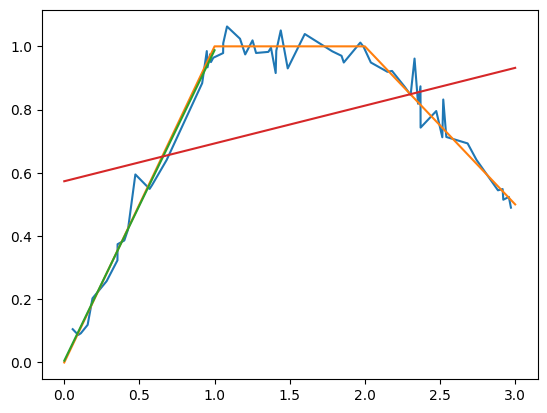

In [ ]:
A,B=coefs(0,19)
a1,b1=coefs(0,59)
print("For first segment:\t slpoe=",A,"intercept=",B)
plt.plot(x,y)
plt.plot(xact,yact)
plt.plot(xact[:11],A*xact[:11]+B)
plt.plot(xact,a1*xact+b1)
plt.show()

As we can see coefs function provides coefficients for slr model.
Green line is line of regression of first linear piece returned by coefs function.
Red line would be the linear regression based on all data points which is a very bad estimate.

60


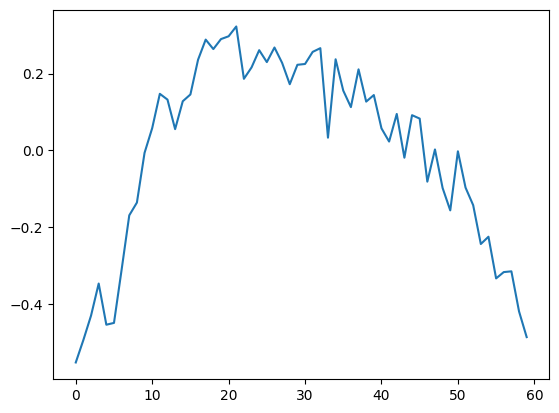

In [ ]:
print(len(x))
plt.plot(y-a1*x-b1)
plt.show()

Expectation of residuals is not 0 locally along x axis.

In [ ]:
cc=np.max((y-a1*x-b1)*(y-a1*x-b1))
print("max residual:",cc,"TSS:",np.sum((y-a1*x-b1)*(y-a1*x-b1)))

max residual: 0.24731675872536948 TSS: 4.180324209630806


In [ ]:
opt=[0 for i in range(len(x)+1)]
e=[[0 for i in range(len(x))] for i in range(len(x))]

In [ ]:
def Min(j,e,c):
    i0=-1
    m=e[0][j]+c
    for i in range(j+1):
      temp=e[i][j]+opt[i]+c
      if temp<m:
        m=temp
        i0=i
    opt[j+1]=m
    return(j,i0)




**Segmented least square function definition**

In [ ]:
def segm_ls(x,y,C):
  pairs=[]
  if len(x)>1:
    for i in range(len(x)-1):
      for j in range(i+1,len(x)):
        at,bt=coefs(i,j)
        #e[i][j]=np.sum((at*x[i:j+1]+bt-y[i:j+1])**2)
        #This calculation of e[i][j] would increase time complexity. We can calculate e[i][j] alternatively as follows:
        e[i][j]= y2_sum[j+1]-y2_sum[i] -2*at*(xy_sum[j+1]-xy_sum[i])+2*at*bt*(x_sum[j+1]-x_sum[i])+at*at*(x2_sum[j+1]-x2_sum[i])-2*bt*(y_sum[j+1]-y_sum[i])+(j-i+1)*bt*bt
        #print(e[i][j])
        # This takes only O(1) time
    #e(i,j) values initialized
  for i in range(len(x)):
    pairs.append(Min(i,e,C))
  #print(opt)
  return pairs






In [ ]:
p=segm_ls(x,y,cc)
print('opt:',opt)

opt: [0, 0.24731675872536948, 0.24731675872536948, 0.24737352300116464, 0.24779470217372368, 0.2507612363234428, 0.2508811145562877, 0.25096049902816137, 0.2529090073927017, 0.2529269037012628, 0.2530827571389471, 0.2666053093188061, 0.268295804418331, 0.2693670166806858, 0.27085982617538695, 0.2711005193805243, 0.2735697210637538, 0.27374764326780093, 0.27388374632973783, 0.2742143441695486, 0.2745000865107717, 0.2780593544850451, 0.2785737441811279, 0.27862492588199833, 0.2901941183962703, 0.3191125802122164, 0.34119323259376666, 0.37637209022933904, 0.42833322001699736, 0.4689914022907069, 0.5306007940475813, 0.5313070408835633, 0.5371100433176299, 0.5390014595666586, 0.5435605326937695, 0.5439366924266765, 0.5441263426601389, 0.5445443487998195, 0.545578382554803, 0.5466527338581778, 0.546816216073534, 0.5479690459292642, 0.5504841063960833, 0.5516404826511405, 0.556672908709458, 0.5627969112420772, 0.564590017760451, 0.5736198515740469, 0.5745024928898588, 0.5962867406069777, 0.60

In [ ]:
p

[(0, -1),
 (1, -1),
 (2, -1),
 (3, -1),
 (4, -1),
 (5, -1),
 (6, -1),
 (7, -1),
 (8, -1),
 (9, -1),
 (10, -1),
 (11, -1),
 (12, -1),
 (13, -1),
 (14, -1),
 (15, -1),
 (16, -1),
 (17, -1),
 (18, -1),
 (19, -1),
 (20, -1),
 (21, -1),
 (22, -1),
 (23, -1),
 (24, -1),
 (25, -1),
 (26, -1),
 (27, -1),
 (28, -1),
 (29, 23),
 (30, 23),
 (31, 20),
 (32, 20),
 (33, 23),
 (34, 23),
 (35, 23),
 (36, 23),
 (37, 23),
 (38, 23),
 (39, 23),
 (40, 23),
 (41, 20),
 (42, 20),
 (43, 20),
 (44, 20),
 (45, 20),
 (46, 20),
 (47, 20),
 (48, 23),
 (49, 23),
 (50, 23),
 (51, 23),
 (52, 23),
 (53, 22),
 (54, 22),
 (55, 23),
 (56, 23),
 (57, 23),
 (58, 23),
 (59, 23)]

Above in list p we can see that 23-59 is one segment, 22-0 is the other segment.
We see how segmented linear regression looks like below:

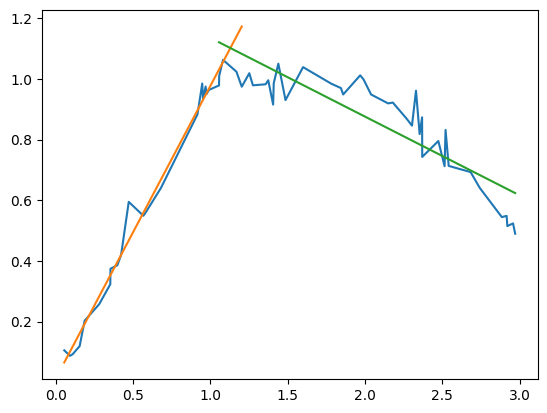

In [ ]:
A,B=coefs(23,59)
a1,b1=coefs(0,22)
#print(A,B)
plt.plot(x,y)
#plt.plot(xact,yact)
plt.plot(x[:25],a1*x[:25]+b1)
plt.plot(x[20:],A*x[20:]+B)
plt.show()

In [ ]:
import pandas as pd

**Model:**
Now we assemble all the components above to make a complete model (model1) below.

In [ ]:
def model1(x,y,f=1):
  xy_sum=np.cumsum(x*y)
  x2_sum=np.cumsum(x*x)
  x_sum=np.cumsum(x)
  y_sum=np.cumsum(y)
  y2_sum=np.cumsum(y*y)
  x2_sum=np.concatenate((np.array([0.]),x2_sum))
  xy_sum=np.concatenate((np.array([0.]),xy_sum))
  x_sum=np.concatenate((np.array([0.]),x_sum))
  y_sum=np.concatenate((np.array([0.]),y_sum))
  y2_sum=np.concatenate((np.array([0.]),y2_sum))

  def coefs(i,j):
    n=j-i+1
    a= (n*(xy_sum[j+1]-xy_sum[i])-(x_sum[j+1]-x_sum[i])*((y_sum[j+1]-y_sum[i])))/(n*(x2_sum[j+1]-x2_sum[i])-((x_sum[j+1]-x_sum[i])*(x_sum[j+1]-x_sum[i])))
    b=((y_sum[j+1]-y_sum[i])-a*(x_sum[j+1]-x_sum[i]))/n
    return a,b
  a1,b1=coefs(0,len(x)-1)

  cc=np.max((y-a1*x-b1)*(y-a1*x-b1))/f
  opt=[0 for i in range(len(x)+1)]
  e=[[0 for i in range(len(x))] for i in range(len(x))]

  def Min(j,e,c):
    i0=-1
    m=e[0][j]+c
    for i in range(j+1):
      temp=e[i][j]+opt[i]+c
      if temp<m:
        m=temp
        i0=i
    opt[j+1]=m
    return(j,i0)

  def segm_ls(x,y,C):
    pairs=[]
    if len(x)>1:
      for i in range(len(x)-1):
        for j in range(i+1,len(x)):
          at,bt=coefs(i,j)
          #e[i][j]=np.sum((at*x[i:j+1]+bt-y[i:j+1])**2)
          #This calculation of e[i][j] would increase time complexity. We can calculate e[i][j] alternatively as follows:
          e[i][j]= y2_sum[j+1]-y2_sum[i] -2*at*(xy_sum[j+1]-xy_sum[i])+2*at*bt*(x_sum[j+1]-x_sum[i])+at*at*(x2_sum[j+1]-x2_sum[i])-2*bt*(y_sum[j+1]-y_sum[i])+(j-i+1)*bt*bt
          #print(e[i][j])
          # This takes only O(1) time
      #e(i,j) values initialized
    for i in range(len(x)):
      pairs.append(Min(i,e,C))
    return pairs


  #plotting
  pp=segm_ls(x,y,cc)
  A,B=coefs(0,len(x)-1)
  a,b=[],[]
  i0=len(x)-1
  while i0>0:
    j1=i0
    i1=max(0,pp[i0][1])
    a1,b1=coefs(i1,j1)
    plt.plot(x[i1:j1+1],a1*x[i1:j1+1]+b1)
    i0=pp[i0][1]-1
  plt.plot(x,y)
  plt.show()

  #return pp



**Examples**

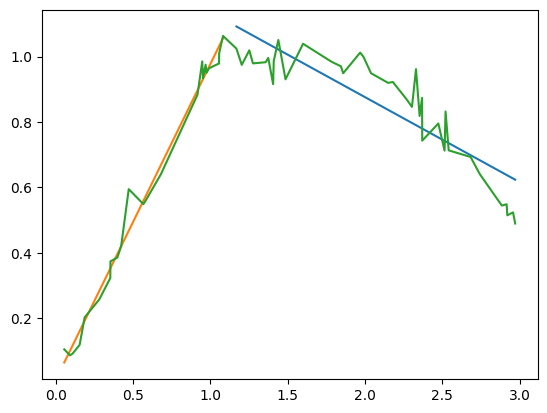

In [ ]:
model1(x,y)

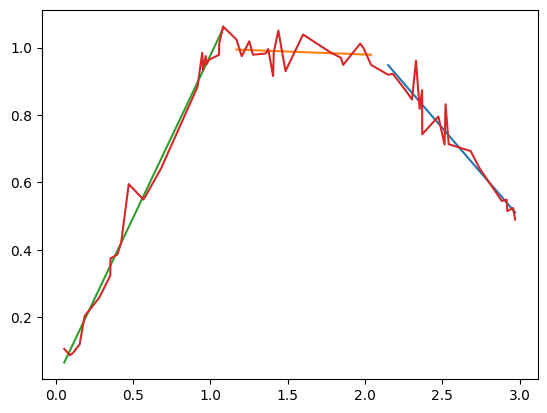

In [ ]:
model1(x,y,10)

**sin(x)**

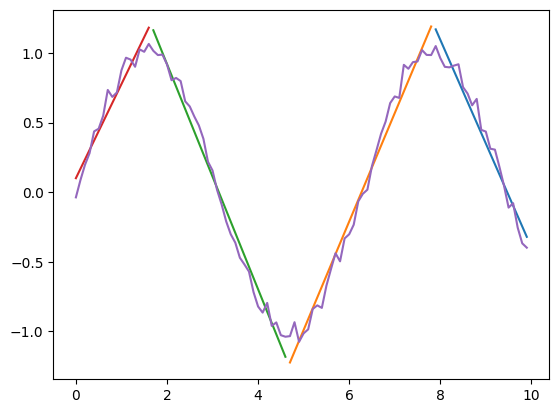

In [ ]:
model1(np.arange(0,10,0.1),np.sin(np.arange(0,10,0.1))+np.random.normal(0,0.05,100))

**Sigmoid**

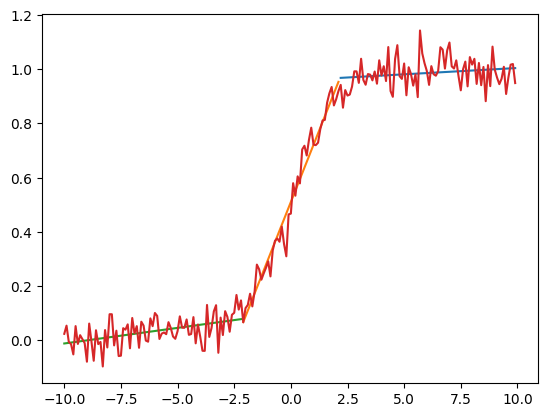

In [ ]:
model1(np.arange(-10,10,0.1),1/(1+np.exp(-np.arange(-10,10,0.1)))+np.random.normal(0,0.05,200))

**Sin^2(x)**

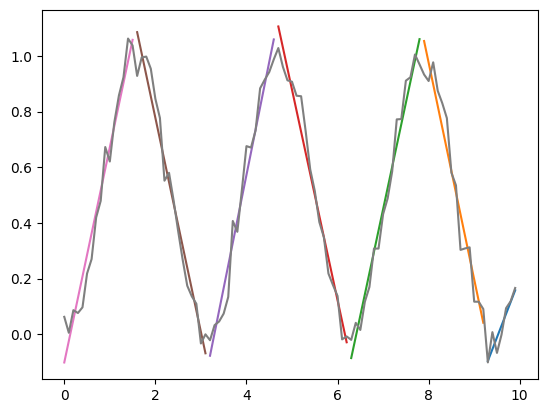

In [ ]:
model1(np.arange(0,10,0.1),np.sin(np.arange(0,10,0.1))**2+np.random.normal(0,0.05,100))

**Cubic polynomial**

In [ ]:
xx=np.arange(-3,2,0.1)
yy=xx**3+xx**2-xx-1

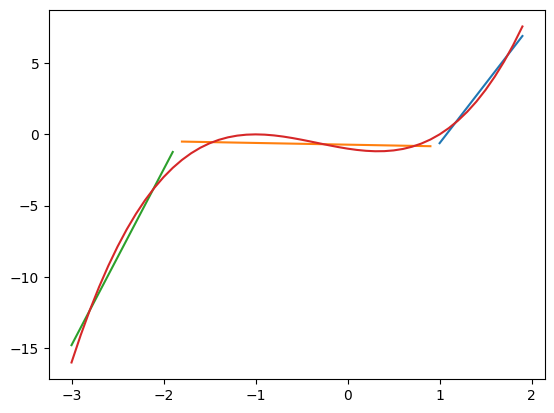

In [ ]:
model1(xx,yy,1)

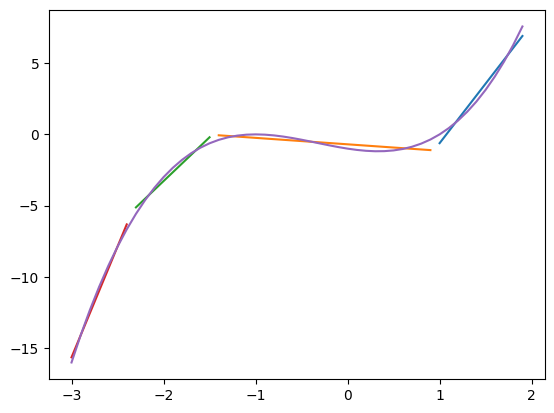

In [ ]:
model1(xx,yy,10)

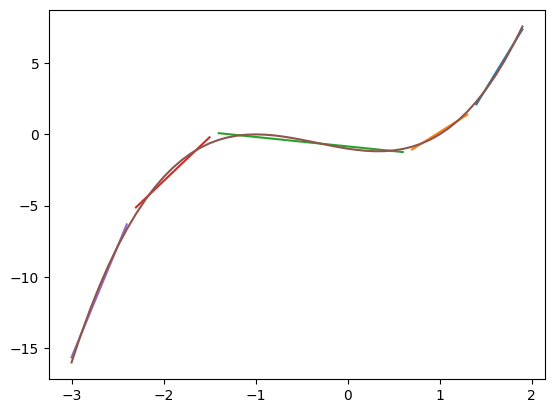

In [ ]:
model1(xx,yy,50)

Increasing the value last parameter in model1 increases the overfitting.

**Illustration on real data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
df=pd.read_csv("USD_INR Historical Data.csv")
df

,Date,Price,Open,High,Low,Change %
0,Aug 23,82.826,82.234,82.985,82.227,0.71%
1,Jul 23,82.240,82.061,82.821,81.666,0.18%
2,Jun 23,82.091,82.666,82.697,81.841,-0.71%
3,May 23,82.680,81.795,82.953,81.650,1.17%
4,Apr 23,81.720,82.391,82.484,81.547,-0.54%
...,...,...,...,...,...,...
271,Jan 01,46.390,46.700,46.821,46.330,-0.62%
272,Dec 00,46.680,46.870,46.927,46.535,-0.41%
273,Nov 00,46.870,46.830,46.977,46.460,0.05%
274,Oct 00,46.845,46.105,46.965,45.955,1.88%


USD exchange rate in INR mothly

In [ ]:
Y=df["Open"].to_numpy()
Y

array([82.234, 82.061, 82.666, 81.795, 82.391, 82.588, 81.765, 82.67 ,
       81.151, 82.817, 81.532, 79.535, 79.185, 78.97 , 77.646, 76.505,
       75.925, 75.289, 74.563, 74.463, 75.08 , 74.96 , 74.185, 72.992,
       74.368, 74.374, 72.508, 74.279, 73.169, 73.585, 72.918, 73.1  ,
       74.025, 74.567, 73.595, 73.215, 74.918, 75.525, 75.47 , 75.319,
       75.32 , 72.527, 71.525, 71.365, 71.785, 70.975, 70.66 , 71.455,
       69.257, 68.962, 69.607, 69.58 , 69.342, 70.826, 71.105, 69.635,
       69.875, 73.855, 72.605, 70.79 , 68.555, 68.49 , 67.455, 66.455,
       65.12 , 65.205, 63.645, 63.855, 64.5  , 64.705, 65.595, 63.925,
       64.105, 64.655, 64.488, 64.285, 64.805, 66.72 , 67.655, 67.955,
       68.595, 66.685, 66.555, 66.962, 66.72 , 67.509, 67.207, 66.425,
       66.355, 68.206, 67.878, 66.209, 66.462, 65.413, 65.524, 66.398,
       63.996, 63.609, 63.733, 63.531, 62.292, 61.713, 62.005, 63.175,
       62.06 , 61.505, 61.83 , 60.52 , 60.745, 60.085, 59.11 , 60.27 ,
      

In [ ]:
X=np.array([i for i in range(len(Y))])

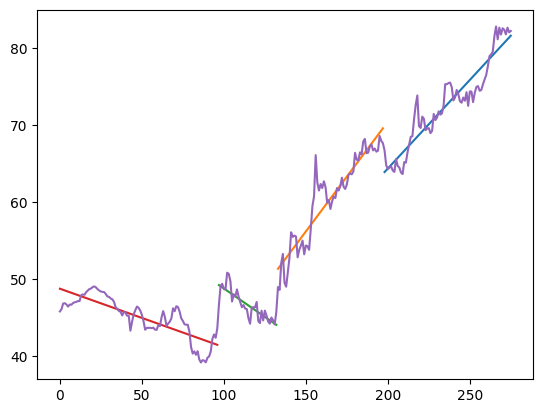

In [ ]:
model1(X,np.flip(Y))

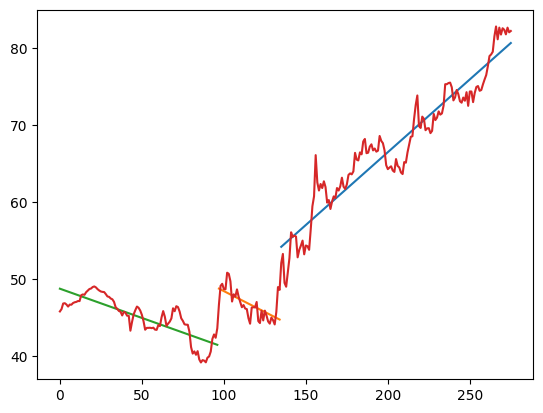

In [ ]:
model1(X,np.flip(Y),0.3)